<h2>Applying Machine Learning Models to Improve Customer Lifetime Value
Final Project Report For BUS228, Spring 2022</h2>

<h1>Introduction</h1>

<p>This paper explores the ways Machine Learning Models can be utilized in order to improve the Customer Lifetime Values for retail firms. As defined by Caldwell (2021), "Customer lifetime value (CLV) is a measure of the average customer's revenue generated over their entire relationship with a company." Venkatesan and Kumar (2004) believe that CLV helps managers select customers and allocate their resources by developing ways to improve their relationships with their customers.
For this project, we have defined the following problem to analyze and solve:
"The lack of CLV forecast or customer segmentation based on CLV increases companies' revenue churn and customer acquisition costs." Hence, our solution to that problem is to use Machine Learning to "Predict and classify CLV of the e-commerce store customers and recommend strategies to increase the CLV of their customers."</p>

In [274]:
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np
from sklearn import metrics

<h2>Download the Data</h2>

In [275]:
uk_data= pd.read_excel("Business_Analytics_Final_Project_UK.xlsx")
uk_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Visits,Avg Time Spent,Salary,Age
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,67,834,72062,29
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,70,1129,106834,53
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,108,1036,67212,30
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,103,1367,103930,41
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,61,1019,82872,53


<h3>Data Preparation</h3>

In [276]:
new_df = uk_data[['Quantity','Customer ID']].groupby('Customer ID').mean().reset_index()
new_df

,Customer ID,Quantity
0,12346.0,0.000000
1,12747.0,12.378641
2,12748.0,5.215424
3,12749.0,6.155844
4,12820.0,12.237288
...,...,...
3945,18280.0,4.500000
3946,18281.0,7.714286
3947,18282.0,7.538462
3948,18283.0,1.847884


In [277]:
uk_data.merge(new_df, left_on='Customer ID', right_on='Customer ID', how = 'left', suffixes=(False, '_average'))

,Invoice,StockCode,Description,QuantityFalse,InvoiceDate,Price,Customer ID,Country,Visits,Avg Time Spent,Salary,Age,Quantity_average
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,67,834,72062,29,5.426282
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,70,1129,106834,53,5.426282
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,108,1036,67212,30,5.426282
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,103,1367,103930,41,5.426282
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,61,1019,82872,53,5.426282
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,79,1451,82068,45,NaN
1048571,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,91,1442,86463,53,NaN
1048572,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,49,760,67004,56,NaN
1048573,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,91,1252,107393,47,NaN


<p>Saving the Qauntity Average in a new dataframe to be able to do the further analysis</p>

In [278]:
uk_data_new = uk_data.merge(new_df, 
                            left_on='Customer ID', right_on='Customer ID', how = 'left', suffixes=(False, '_average'))
uk_data_new

,Invoice,StockCode,Description,QuantityFalse,InvoiceDate,Price,Customer ID,Country,Visits,Avg Time Spent,Salary,Age,Quantity_average
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,67,834,72062,29,5.426282
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,70,1129,106834,53,5.426282
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,108,1036,67212,30,5.426282
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,103,1367,103930,41,5.426282
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,61,1019,82872,53,5.426282
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,79,1451,82068,45,NaN
1048571,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,91,1442,86463,53,NaN
1048572,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,49,760,67004,56,NaN
1048573,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,91,1252,107393,47,NaN


<p>As some of the customers have ordered in a negative quantity, which is not possible. So, you need to filter Quantity greater than zero.</p>

In [279]:
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486286 entries, 0 to 495477
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Invoice         486286 non-null  object        
 1   StockCode       486286 non-null  object        
 2   Description     485694 non-null  object        
 3   Quantity        486286 non-null  float64       
 4   InvoiceDate     486286 non-null  datetime64[ns]
 5   Price           486286 non-null  float64       
 6   Customer ID     354345 non-null  float64       
 7   Country         486286 non-null  object        
 8   Visits          486286 non-null  int64         
 9   Avg Time Spent  486286 non-null  int64         
 10  Salary          486286 non-null  int64         
 11  Age             486286 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 48.2+ MB


<p>The describe() function in pandas is convenient in getting various summary statistics. This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.</p>

In [280]:
uk_data.describe()

,Quantity,Price,Customer ID,Visits,Avg Time Spent,Salary,Age
count,486286.000000,486286.000000,354345.000000,486286.000000,486286.000000,486286.000000,486286.000000
mean,9.734640,3.794976,15552.436219,64.971025,999.108035,87006.769292,42.006819
std,163.262428,41.271159,1594.546025,26.246859,288.861418,17882.670873,8.941652
min,1.000000,-11062.060000,12346.000000,20.000000,500.000000,56000.000000,27.000000
25%,1.000000,1.250000,14194.000000,42.000000,749.000000,71527.000000,34.000000
50%,3.000000,2.100000,15522.000000,65.000000,999.000000,87000.000000,42.000000
75%,10.000000,4.130000,16931.000000,88.000000,1248.000000,102473.000000,50.000000
max,80995.000000,13541.330000,18287.000000,110.000000,1500.000000,118000.000000,57.000000


<p>Filter the necessary columns for calculating CLTV. We only need the following columns CustomerID, InvoiceDate, Invoice, Quantity,Price, Visits, Avg Time Spent, Age and Salary</p>

In [282]:
uk_data  = uk_data[['Customer ID','InvoiceDate','Invoice','Quantity','Price', 
                    'Visits','Avg Time Spent', 'Age', 'Salary']]
uk_data

,Customer ID,InvoiceDate,Invoice,Quantity,Price,Visits,Avg Time Spent,Age,Salary
0,17850.0,2010-12-01 08:26:00,536365,6.0,2.55,67,834,29,72062
1,17850.0,2010-12-01 08:26:00,536365,6.0,3.39,70,1129,53,106834
2,17850.0,2010-12-01 08:26:00,536365,8.0,2.75,108,1036,30,67212
3,17850.0,2010-12-01 08:26:00,536365,6.0,3.39,103,1367,41,103930
4,17850.0,2010-12-01 08:26:00,536365,6.0,3.39,61,1019,53,82872
...,...,...,...,...,...,...,...,...,...
495473,15804.0,2011-12-09 12:31:00,581585,12.0,1.95,47,889,31,80458
495474,13113.0,2011-12-09 12:49:00,581586,8.0,2.95,54,847,47,107077
495475,13113.0,2011-12-09 12:49:00,581586,24.0,1.25,107,1085,55,68994
495476,13113.0,2011-12-09 12:49:00,581586,24.0,8.95,26,1025,48,59848


<p>Calculated the total purchase for each customer by multiplying the quanitiy to the unit price.</P>

In [283]:
uk_data['TotalPurchase'] = uk_data['Quantity'] * uk_data['Price']
uk_data['TotalPurchase']

0          15.30
1          20.34
2          22.00
3          20.34
4          20.34
           ...  
495473     23.40
495474     23.60
495475     30.00
495476    214.80
495477     70.80
Name: TotalPurchase, Length: 486286, dtype: float64



<p>Here, we performed the following operations:

   <ul>
       
<li>Calculate the number of days between the present date and the date of last purchase from each customer.</li>
<li>Calculate the number of orders for each customer.</li>
<li>Calculate sum of purchase price for each customer.</li>
       
         

In [284]:
uk_data_group=uk_data.groupby('Customer ID').agg({'InvoiceDate': lambda date: (date.max() - date.min()),
                                        'Invoice': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'TotalPurchase': lambda price: price.sum()})
uk_data_group.head()

,InvoiceDate,Invoice,Quantity,TotalPurchase
Customer ID,,,,
12346.0,0 days 00:00:00,1,74215.0,77183.60
12747.0,366 days 22:56:00,103,1275.0,4196.01
12748.0,372 days 23:32:00,4596,25748.0,33719.73
12749.0,209 days 18:31:00,199,1471.0,4090.88
12820.0,323 days 02:38:00,59,722.0,942.34


<h3>Renaming the columns</h3>

In [285]:
uk_data_group.columns=['Num_Days','Num_Transactions','Num_Units','Spent_Money']
uk_data_group.head()

,Num_Days,Num_Transactions,Num_Units,Spent_Money
Customer ID,,,,
12346.0,0 days 00:00:00,1,74215.0,77183.60
12747.0,366 days 22:56:00,103,1275.0,4196.01
12748.0,372 days 23:32:00,4596,25748.0,33719.73
12749.0,209 days 18:31:00,199,1471.0,4090.88
12820.0,323 days 02:38:00,59,722.0,942.34


<h3>Calculating Average Order Value</h3>

In [286]:
uk_data_group['Avg_Order_Value']=uk_data_group['Spent_Money']/uk_data_group['Num_Transactions']
uk_data_group.head()

,Num_Days,Num_Transactions,Num_Units,Spent_Money,Avg_Order_Value
Customer ID,,,,,
12346.0,0 days 00:00:00,1,74215.0,77183.60,77183.600000
12747.0,366 days 22:56:00,103,1275.0,4196.01,40.737961
12748.0,372 days 23:32:00,4596,25748.0,33719.73,7.336756
12749.0,209 days 18:31:00,199,1471.0,4090.88,20.557186
12820.0,323 days 02:38:00,59,722.0,942.34,15.971864


<h3>Calculating Purchase Frequency</h3>

In [287]:
purchase_frequency=sum(uk_data_group['Num_Transactions'])/uk_data_group.shape[0]

print(purchase_frequency)

90.37107880642694


<h3>Retention Rate</h3>

In [288]:
retention_rate=uk_data_group[uk_data_group.Num_Transactions > 1].shape[0]/uk_data_group.shape[0]

print(retention_rate)

0.9818923743942872


<h3>Calculating Churn Rate</h3>

In [289]:
churn_rate=1-retention_rate

print(churn_rate)

0.018107625605712774


In [388]:
retention_rate,churn_rate, purchase_frequency

(0.9818923743942872, 0.018107625605712774, 90.37107880642694)

<h3>Calculating Profit Margin</h3>

In [291]:
uk_data_group['Profit_Margin']=uk_data_group['Spent_Money']*0.05

<h3>Calculate CLTV using following formula:</h3>
<p>CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.

 Customer Value = Average Order Value * Purchase Frequency </p>

In [292]:
uk_data_group['CLV']=((uk_data_group['Avg_Order_Value']*purchase_frequency)/churn_rate)*uk_data_group['Profit_Margin']
uk_data_group.head()

,Num_Days,Num_Transactions,Num_Units,Spent_Money,Avg_Order_Value,Profit_Margin,CLV
Customer ID,,,,,,,
12346.0,0 days 00:00:00,1,74215.0,77183.60,77183.600000,3859.1800,1.486579e+12
12747.0,366 days 22:56:00,103,1275.0,4196.01,40.737961,209.8005,4.265538e+07
12748.0,372 days 23:32:00,4596,25748.0,33719.73,7.336756,1685.9865,6.173424e+07
12749.0,209 days 18:31:00,199,1471.0,4090.88,20.557186,204.5440,2.098545e+07
12820.0,323 days 02:38:00,59,722.0,942.34,15.971864,47.1170,3.755789e+06


In [293]:
uk_data

,Customer ID,InvoiceDate,Invoice,Quantity,Price,Visits,Avg Time Spent,Age,Salary,TotalPurchase
0,17850.0,2010-12-01 08:26:00,536365,6.0,2.55,67,834,29,72062,15.30
1,17850.0,2010-12-01 08:26:00,536365,6.0,3.39,70,1129,53,106834,20.34
2,17850.0,2010-12-01 08:26:00,536365,8.0,2.75,108,1036,30,67212,22.00
3,17850.0,2010-12-01 08:26:00,536365,6.0,3.39,103,1367,41,103930,20.34
4,17850.0,2010-12-01 08:26:00,536365,6.0,3.39,61,1019,53,82872,20.34
...,...,...,...,...,...,...,...,...,...,...
495473,15804.0,2011-12-09 12:31:00,581585,12.0,1.95,47,889,31,80458,23.40
495474,13113.0,2011-12-09 12:49:00,581586,8.0,2.95,54,847,47,107077,23.60
495475,13113.0,2011-12-09 12:49:00,581586,24.0,1.25,107,1085,55,68994,30.00
495476,13113.0,2011-12-09 12:49:00,581586,24.0,8.95,26,1025,48,59848,214.80


<h3>Getting all feature variables into one dataframe</h3>

In [389]:
uk_data_final = pd.DataFrame()


uk_data_final['Quantity'] = uk_data_group['Num_Units']
uk_data_final['CLV'] = uk_data_group['CLV']

uk_data_final

,Quantity,CLV
Customer ID,,
12346.0,74215.0,1.486579e+12
12747.0,1275.0,4.265538e+07
12748.0,25748.0,6.173424e+07
12749.0,1471.0,2.098545e+07
12820.0,722.0,3.755789e+06
...,...,...
18280.0,45.0,8.139045e+05
18281.0,54.0,2.328507e+05
18282.0,103.0,6.592356e+05


In [295]:
arr_list = []

for i in uk_data_final.index:
    arr_list.append(uk_data[uk_data['Customer ID'] == i]['Visits'].values[0])
    

    
uk_data_final['Visits'] = arr_list


uk_data_final

,Quantity,CLV,Visits
Customer ID,,,
12346.0,74215.0,1.486579e+12,56
12747.0,1275.0,4.265538e+07,39
12748.0,25748.0,6.173424e+07,100
12749.0,1471.0,2.098545e+07,33
12820.0,722.0,3.755789e+06,34
...,...,...,...
18280.0,45.0,8.139045e+05,81
18281.0,54.0,2.328507e+05,73
18282.0,103.0,6.592356e+05,59


In [296]:
arr_list = []

for i in uk_data_final.index:
    arr_list.append(uk_data[uk_data['Customer ID'] == i]['Avg Time Spent'].values[0])
    

    
uk_data_final['Avg Time Spent'] = arr_list


uk_data_final

,Quantity,CLV,Visits,Avg Time Spent
Customer ID,,,,
12346.0,74215.0,1.486579e+12,56,661
12747.0,1275.0,4.265538e+07,39,922
12748.0,25748.0,6.173424e+07,100,977
12749.0,1471.0,2.098545e+07,33,1054
12820.0,722.0,3.755789e+06,34,778
...,...,...,...,...
18280.0,45.0,8.139045e+05,81,1497
18281.0,54.0,2.328507e+05,73,1327
18282.0,103.0,6.592356e+05,59,813


In [297]:
arr_list = []

for i in uk_data_final.index:
    arr_list.append(uk_data[uk_data['Customer ID'] == i]['Salary'].values[0])
    

    
uk_data_final['Salary'] = arr_list


uk_data_final

,Quantity,CLV,Visits,Avg Time Spent,Salary
Customer ID,,,,,
12346.0,74215.0,1.486579e+12,56,661,74844
12747.0,1275.0,4.265538e+07,39,922,114524
12748.0,25748.0,6.173424e+07,100,977,110625
12749.0,1471.0,2.098545e+07,33,1054,87376
12820.0,722.0,3.755789e+06,34,778,94636
...,...,...,...,...,...
18280.0,45.0,8.139045e+05,81,1497,112417
18281.0,54.0,2.328507e+05,73,1327,82729
18282.0,103.0,6.592356e+05,59,813,116973


In [298]:
arr_list = []

for i in uk_data_final.index:
    arr_list.append(uk_data[uk_data['Customer ID'] == i]['Age'].values[0])
    

    
uk_data_final['Age'] = arr_list


uk_data_final

,Quantity,CLV,Visits,Avg Time Spent,Salary,Age
Customer ID,,,,,,
12346.0,74215.0,1.486579e+12,56,661,74844,31
12747.0,1275.0,4.265538e+07,39,922,114524,44
12748.0,25748.0,6.173424e+07,100,977,110625,45
12749.0,1471.0,2.098545e+07,33,1054,87376,39
12820.0,722.0,3.755789e+06,34,778,94636,51
...,...,...,...,...,...,...
18280.0,45.0,8.139045e+05,81,1497,112417,30
18281.0,54.0,2.328507e+05,73,1327,82729,48
18282.0,103.0,6.592356e+05,59,813,116973,49


In [299]:
arr_list = []

for i in uk_data_final.index:
    arr_list.append(uk_data_new[uk_data_new['Customer ID'] == i]['Quantity_average'].values[0])
    

    
uk_data_final['Quantity_average'] = arr_list


uk_data_final

,Quantity,CLV,Visits,Avg Time Spent,Salary,Age,Quantity_average
Customer ID,,,,,,,
12346.0,74215.0,1.486579e+12,56,661,74844,31,0.000000
12747.0,1275.0,4.265538e+07,39,922,114524,44,12.378641
12748.0,25748.0,6.173424e+07,100,977,110625,45,5.215424
12749.0,1471.0,2.098545e+07,33,1054,87376,39,6.155844
12820.0,722.0,3.755789e+06,34,778,94636,51,12.237288
...,...,...,...,...,...,...,...
18280.0,45.0,8.139045e+05,81,1497,112417,30,4.500000
18281.0,54.0,2.328507e+05,73,1327,82729,48,7.714286
18282.0,103.0,6.592356e+05,59,813,116973,49,7.538462


In [300]:
uk_data

,Customer ID,InvoiceDate,Invoice,Quantity,Price,Visits,Avg Time Spent,Age,Salary,TotalPurchase
0,17850.0,2010-12-01 08:26:00,536365,6.0,2.55,67,834,29,72062,15.30
1,17850.0,2010-12-01 08:26:00,536365,6.0,3.39,70,1129,53,106834,20.34
2,17850.0,2010-12-01 08:26:00,536365,8.0,2.75,108,1036,30,67212,22.00
3,17850.0,2010-12-01 08:26:00,536365,6.0,3.39,103,1367,41,103930,20.34
4,17850.0,2010-12-01 08:26:00,536365,6.0,3.39,61,1019,53,82872,20.34
...,...,...,...,...,...,...,...,...,...,...
495473,15804.0,2011-12-09 12:31:00,581585,12.0,1.95,47,889,31,80458,23.40
495474,13113.0,2011-12-09 12:49:00,581586,8.0,2.95,54,847,47,107077,23.60
495475,13113.0,2011-12-09 12:49:00,581586,24.0,1.25,107,1085,55,68994,30.00
495476,13113.0,2011-12-09 12:49:00,581586,24.0,8.95,26,1025,48,59848,214.80


In [301]:
uk_data_final

,Quantity,CLV,Visits,Avg Time Spent,Salary,Age,Quantity_average
Customer ID,,,,,,,
12346.0,74215.0,1.486579e+12,56,661,74844,31,0.000000
12747.0,1275.0,4.265538e+07,39,922,114524,44,12.378641
12748.0,25748.0,6.173424e+07,100,977,110625,45,5.215424
12749.0,1471.0,2.098545e+07,33,1054,87376,39,6.155844
12820.0,722.0,3.755789e+06,34,778,94636,51,12.237288
...,...,...,...,...,...,...,...
18280.0,45.0,8.139045e+05,81,1497,112417,30,4.500000
18281.0,54.0,2.328507e+05,73,1327,82729,48,7.714286
18282.0,103.0,6.592356e+05,59,813,116973,49,7.538462


<h3>Linear Regression</h3>

In [323]:
X=uk_data_final[['Quantity_average' ,'Avg Time Spent','Visits', 'Age','Salary']] # remove proft margin
y=uk_data_final[['CLV']]

In [324]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=70)

In [325]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(linreg.intercept_)
print(linreg.coef_)

[1.62499549e+10]
[[-4.79914280e+05  6.85782888e+05 -2.65733269e+07 -2.30319282e+08
  -4.25147375e+04]]


In [326]:
from sklearn import metrics
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: -5.285950482792133


In [327]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2450780256.643697
MSE 1.026413094905108e+19
RMSE: 3203768242.0941563


In [380]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=70)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2744, 5) (2744,) (1177, 5) (1177,)


<h3>OLS Regression</h3>

In [381]:
import statsmodels.api as sm
train_y = np.array(train_y)
olsreg = sm.OLS(train_y, train_X)
olsreg = olsreg.fit()
print(olsreg.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.799
Model:                            OLS   Adj. R-squared (uncentered):              0.799
Method:                 Least Squares   F-statistic:                              2182.
Date:                Sun, 22 May 2022   Prob (F-statistic):                        0.00
Time:                        22:16:53   Log-Likelihood:                         -1408.4
No. Observations:                2744   AIC:                                      2827.
Df Residuals:                    2739   BIC:                                      2856.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

<h3>Decision Trees</h3>

In [331]:
uk_data_final['CLV'].describe()

count    3.921000e+03
mean     1.076846e+09
std      4.461245e+10
min      0.000000e+00
25%      9.940335e+05
50%      2.704984e+06
75%      8.267836e+06
max      2.360885e+12
Name: CLV, dtype: float64

In [332]:
uk_data_final.describe()
uk_data_final["CLV"] = np.where(uk_data_final["CLV"] > 1.170005e+07, 0, 1)

In [333]:
uk_data_final[uk_data_final["CLV"] == 0]

,Quantity,CLV,Visits,Avg Time Spent,Salary,Age,Quantity_average
Customer ID,,,,,,,
12346.0,74215.0,0,56,661,74844,31,0.000000
12747.0,1275.0,0,39,922,114524,44,12.378641
12748.0,25748.0,0,100,977,110625,45,5.215424
12749.0,1471.0,0,33,1054,87376,39,6.155844
12823.0,230.0,0,93,1077,96714,41,46.000000
...,...,...,...,...,...,...,...
18251.0,7824.0,0,57,1352,87344,38,489.000000
18259.0,714.0,0,69,854,105802,52,17.000000
18260.0,1478.0,0,42,877,101295,52,10.492857


In [334]:
uk_data_final

,Quantity,CLV,Visits,Avg Time Spent,Salary,Age,Quantity_average
Customer ID,,,,,,,
12346.0,74215.0,0,56,661,74844,31,0.000000
12747.0,1275.0,0,39,922,114524,44,12.378641
12748.0,25748.0,0,100,977,110625,45,5.215424
12749.0,1471.0,0,33,1054,87376,39,6.155844
12820.0,722.0,1,34,778,94636,51,12.237288
...,...,...,...,...,...,...,...
18280.0,45.0,1,81,1497,112417,30,4.500000
18281.0,54.0,1,73,1327,82729,48,7.714286
18282.0,103.0,1,59,813,116973,49,7.538462


In [350]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [351]:
clf = DecisionTreeClassifier(random_state=0, max_depth=2)

In [352]:
from sklearn import tree

In [353]:
X=uk_data_final[['Quantity_average', 'Visits', 'Salary', 'Age', 'Avg Time Spent']] 
y=uk_data_final['CLV']

In [354]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [355]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [356]:
yhat_test = clf.predict(X_test)
# Compute accuracy based on test samples
acc = metrics.accuracy_score(y_test, yhat_test)
acc

0.8481141692150866

[Text(1162.5, 1887.5, 'X[0] <= 19.181\ngini = 0.308\nsamples = 2940\nvalue = [558, 2382]'),
 Text(581.25, 1132.5, 'X[0] <= 8.159\ngini = 0.227\nsamples = 2496\nvalue = [325, 2171]'),
 Text(290.625, 377.5, 'gini = 0.101\nsamples = 1224\nvalue = [65, 1159]'),
 Text(871.875, 377.5, 'gini = 0.325\nsamples = 1272\nvalue = [260, 1012]'),
 Text(1743.75, 1132.5, 'X[0] <= 37.843\ngini = 0.499\nsamples = 444\nvalue = [233, 211]'),
 Text(1453.125, 377.5, 'gini = 0.48\nsamples = 273\nvalue = [109, 164]'),
 Text(2034.375, 377.5, 'gini = 0.399\nsamples = 171\nvalue = [124, 47]')]

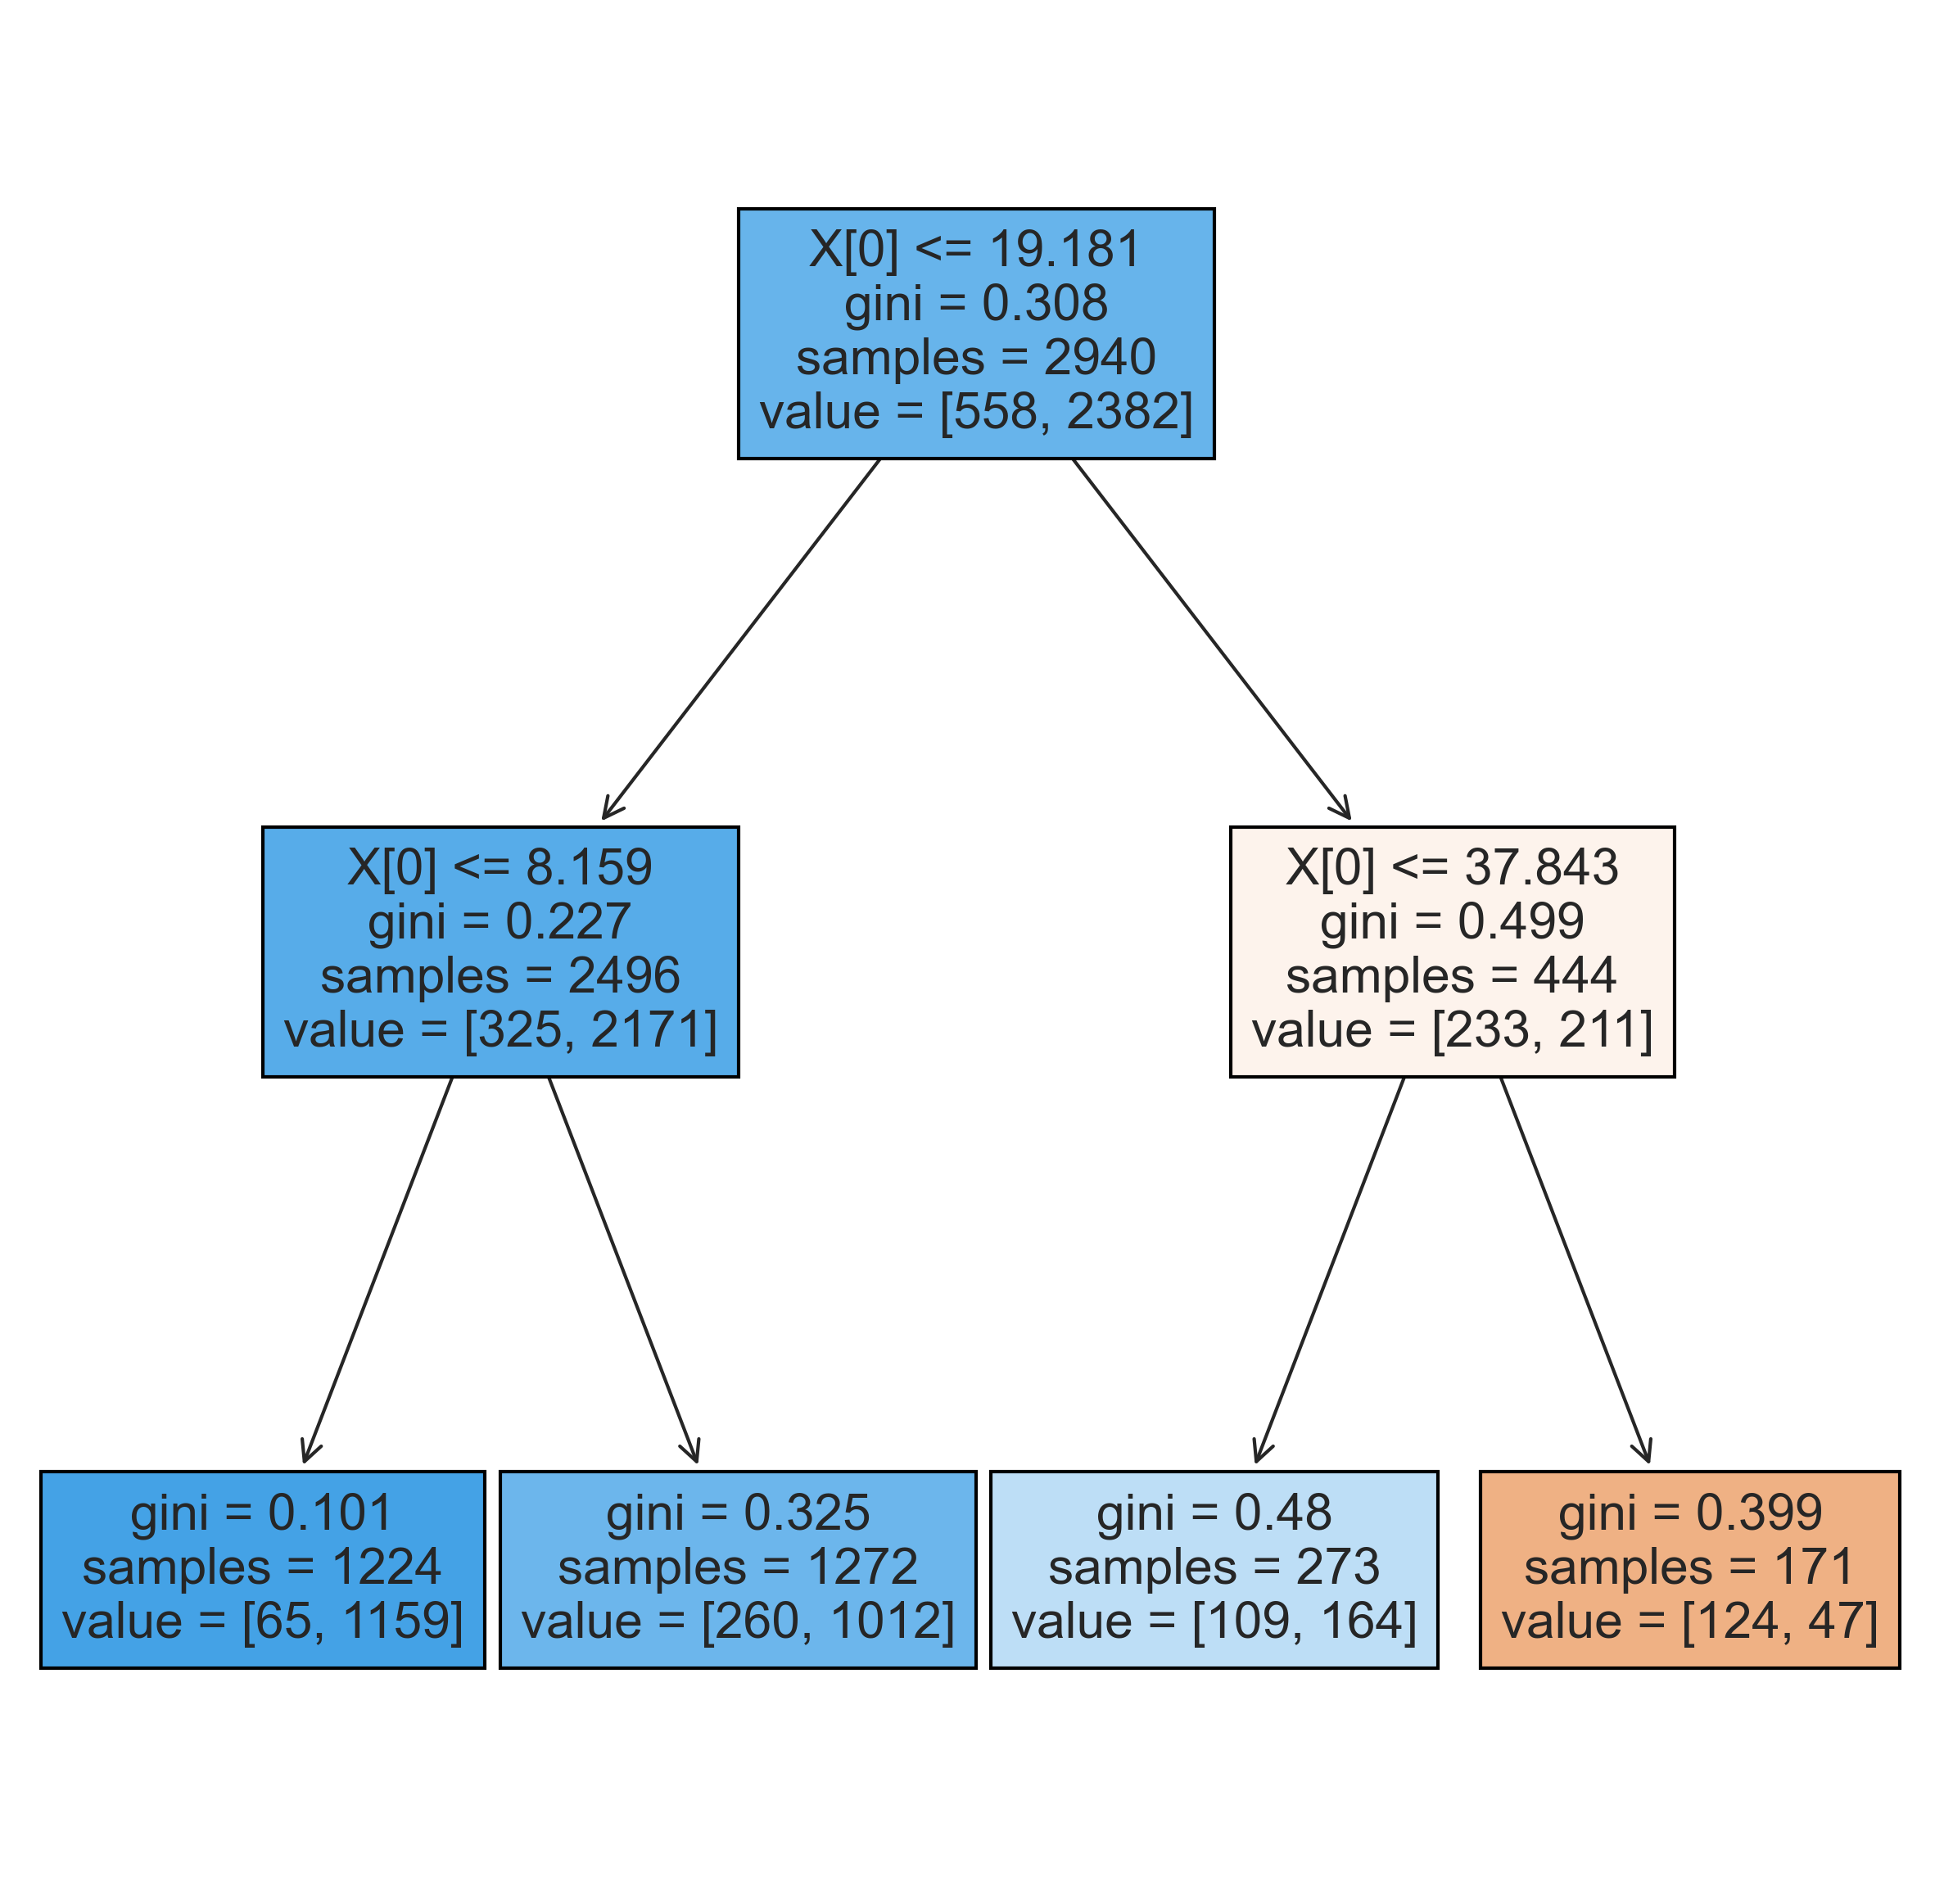

In [357]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)

tree.plot_tree(clf,filled=True)

In [358]:
X.shape

(3921, 5)

In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import pydot
from IPython.display import Image
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

In [360]:
regr1 = RandomForestRegressor(max_features=5, random_state=30)
regr1.fit(X_train, y_train)

RandomForestRegressor(max_features=5, random_state=30)

Text(0, 0.5, 'y_test')

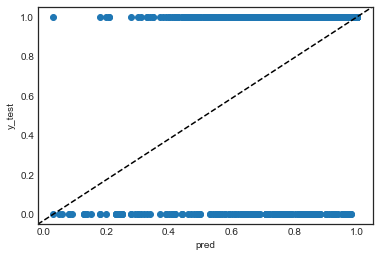

In [361]:
pred = regr1.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [362]:
regr2 = RandomForestRegressor(max_features=5, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(max_features=5, random_state=1)

In [378]:
pred = regr2.predict(X_test)
mean_squared_error(y_test, pred)

0.13045973496432212

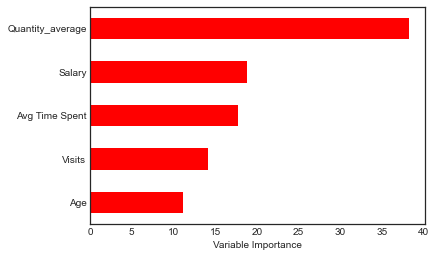

In [364]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

<h3>Logistic Regression</h3>

In [366]:
uk_data_final

,Quantity,CLV,Visits,Avg Time Spent,Salary,Age,Quantity_average
Customer ID,,,,,,,
12346.0,74215.0,0,56,661,74844,31,0.000000
12747.0,1275.0,0,39,922,114524,44,12.378641
12748.0,25748.0,0,100,977,110625,45,5.215424
12749.0,1471.0,0,33,1054,87376,39,6.155844
12820.0,722.0,1,34,778,94636,51,12.237288
...,...,...,...,...,...,...,...
18280.0,45.0,1,81,1497,112417,30,4.500000
18281.0,54.0,1,73,1327,82729,48,7.714286
18282.0,103.0,1,59,813,116973,49,7.538462


In [367]:
X=uk_data_final[['Quantity_average', 'Visits', 'Salary', 'Age', 'Avg Time Spent']] 
y=uk_data_final['CLV']

In [368]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [369]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [370]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  5, 181],
       [  0, 795]])

In [371]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

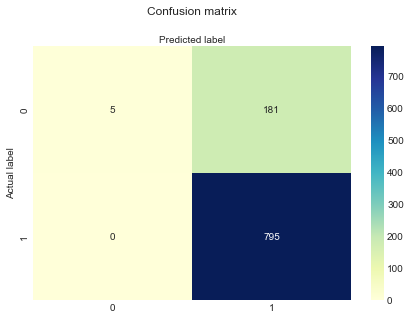

In [372]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [373]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8154943934760448
Precision: 0.8145491803278688
Recall: 1.0


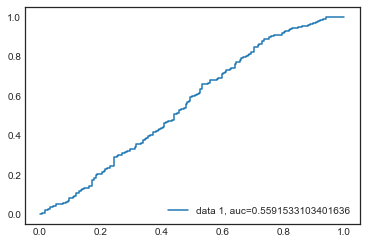

In [374]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

(2940, 5) (2940,) (981, 5) (981,)


<h3>Lasso Regression</h3>

In [375]:
from sklearn.metrics import mean_squared_error
>>> from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

0.39132893055544293
0.004130075385039178
0.3893647775893459
0.013331493434050268


<h3>Ridge Regression</h3>

In [377]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

0.3913271384667906
0.004139196525671629
0.38939756595423985
0.01316531194547077
